## CUSTOMER SEGMENTATION: CAMPAIGN AND RFM ANALYSIS
Author: Edycakra Immanuel Sinaga

## Pt 2: Exploratory Data Analysis (EDA)

In [11]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

- Load Dataset
- Dataset Description
- Dataset Overview (Selected Numerical)
- Dataset Correlations (Selected Numerical)
- Analysis for Numerical Attributes
- Analysis for Categorical Atributes


### Load Dataset

In [12]:
df = pd.read_csv('../dataset/processed/marketingcampaign_processed.csv', encoding='latin-1')

In [13]:
df.head()

,CustomerID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_CostContact,Z_Revenue,Response,age,weeks_since_joining,months_since_joining,total_spending,marital_status_new,child_new,education_new
0,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,3,11,0,69,496,114,27,0,1,1
1,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,3,11,0,58,524,121,776,1,0,1
2,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,3,11,0,39,499,115,53,1,1,1
3,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,11,0,42,503,116,422,1,1,3
4,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,3,11,0,56,521,120,716,1,0,2


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1983 entries, 0 to 1982
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            1983 non-null   int64  
 1   Year_Birth            1983 non-null   int64  
 2   Education             1983 non-null   object 
 3   Marital_Status        1983 non-null   object 
 4   Income                1983 non-null   float64
 5   Kidhome               1983 non-null   int64  
 6   Teenhome              1983 non-null   int64  
 7   Dt_Customer           1983 non-null   object 
 8   Recency               1983 non-null   int64  
 9   MntWines              1983 non-null   int64  
 10  MntFruits             1983 non-null   int64  
 11  MntMeatProducts       1983 non-null   int64  
 12  MntFishProducts       1983 non-null   int64  
 13  MntSweetProducts      1983 non-null   int64  
 14  MntGoldProds          1983 non-null   int64  
 15  NumDealsPurchases    

### Data Descriptions

1. Number of Instances: 1983
2. Attributes:
- ID: the unique identification code for every customer
- Year_Birth: The Year of a customer's birth
- Education: The level of education that a customer completed
- Marital_Status: Status of Marriage
- Income: Annual Income
- Kidhome: # of children under the age of 13 in Customer's household
- Teenhome: # of children between 13-19 in Customer's household
- Dt_Customer: Date of Customer Enrollment
- Recency: # of days since last purchase
- MntWines: Dollar amount of Wines purchased in last 2 years
- MntFruits: Dollar amount of Fruits purchased in last 2 years
- MntMeatProducts: Dollar amount of Meat products purchased in the last 2 years
- MntFishProducts: Dollar amount of Fish products purchased in the last 2 years
- MntSweetProducts: Dollar amount of Sweet products purchased in the last 2 years
- MntGoldProds: Dollar amount of Gold products purchased in the last 2 years
- NumDealsPurchases: # of purchases made with discount
- NumWebPurchases: # of purchases made through the company's website
- NumCatalogPurchases: # of purchases made using the catalog
- NumStorePurchases: # of purchases made directly in-store
- NumWebVisitsMonth: # of visits made through company's website
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Complain: 1 if customer complained in the last 2 years, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
- Z_Cost
- Z_Revenue
- age: customer's age  
- weeks_since_joining: # of weeks since joining  
- months_since_joining: # of months since joining   
- total_spending: Dollar amount of total spending from 6 products  
- marital_status_new: 1 if customer is married, 0 otherwise
- child_new: 1 if customer has children, 0 otherwise
- education_new: label encoded of education

### Dataset Overview (Selected Numerical)

In [15]:
# #remove the ID column
# df = df.drop(df.columns[0], axis=1)

In [16]:
#numerical df
selected_columns = ["Income", "age", "total_spending", "NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumWebVisitsMonth"]

In [17]:
#select specific columns using loc and assign to a new DataFrame
df2 = df.loc[:, selected_columns]

In [18]:
df2.describe().astype(int)

,Income,age,total_spending,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,1983,1983,1983,1983,1983,1983,1983,1983
mean,51216,53,576,1,3,2,5,5
std,21251,11,599,1,2,2,3,2
min,7500,27,6,0,0,0,0,0
25%,34142,45,63,1,2,0,3,3
50%,50300,53,312,2,3,1,4,6
75%,68145,63,1012,3,6,4,8,7
max,162397,83,2486,5,11,9,13,10


### Dataset Correlations (Selected Numerical)


In [19]:
correlation_matrix = df[selected_columns].corr().round(2)
correlation_matrix

,Income,age,total_spending,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
Income,1.00,0.22,0.81,-0.19,0.53,0.73,0.67,-0.67
age,0.22,1.00,0.12,0.08,0.16,0.15,0.16,-0.15
total_spending,0.81,0.12,1.00,-0.15,0.59,0.83,0.71,-0.53
NumDealsPurchases,-0.19,0.08,-0.15,1.00,0.25,-0.11,0.04,0.35
NumWebPurchases,0.53,0.16,0.59,0.25,1.00,0.52,0.58,-0.07
NumCatalogPurchases,0.73,0.15,0.83,-0.11,0.52,1.00,0.65,-0.57
NumStorePurchases,0.67,0.16,0.71,0.04,0.58,0.65,1.00,-0.48
NumWebVisitsMonth,-0.67,-0.15,-0.53,0.35,-0.07,-0.57,-0.48,1.00


<AxesSubplot: >

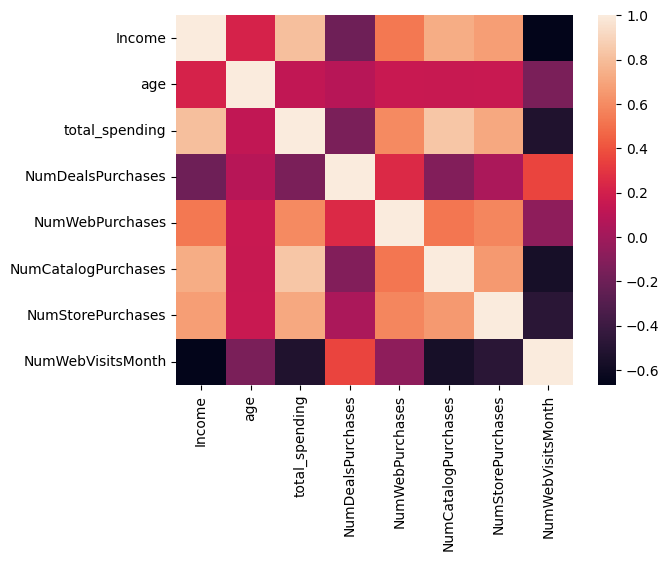

In [20]:
sns.heatmap(df2.corr())

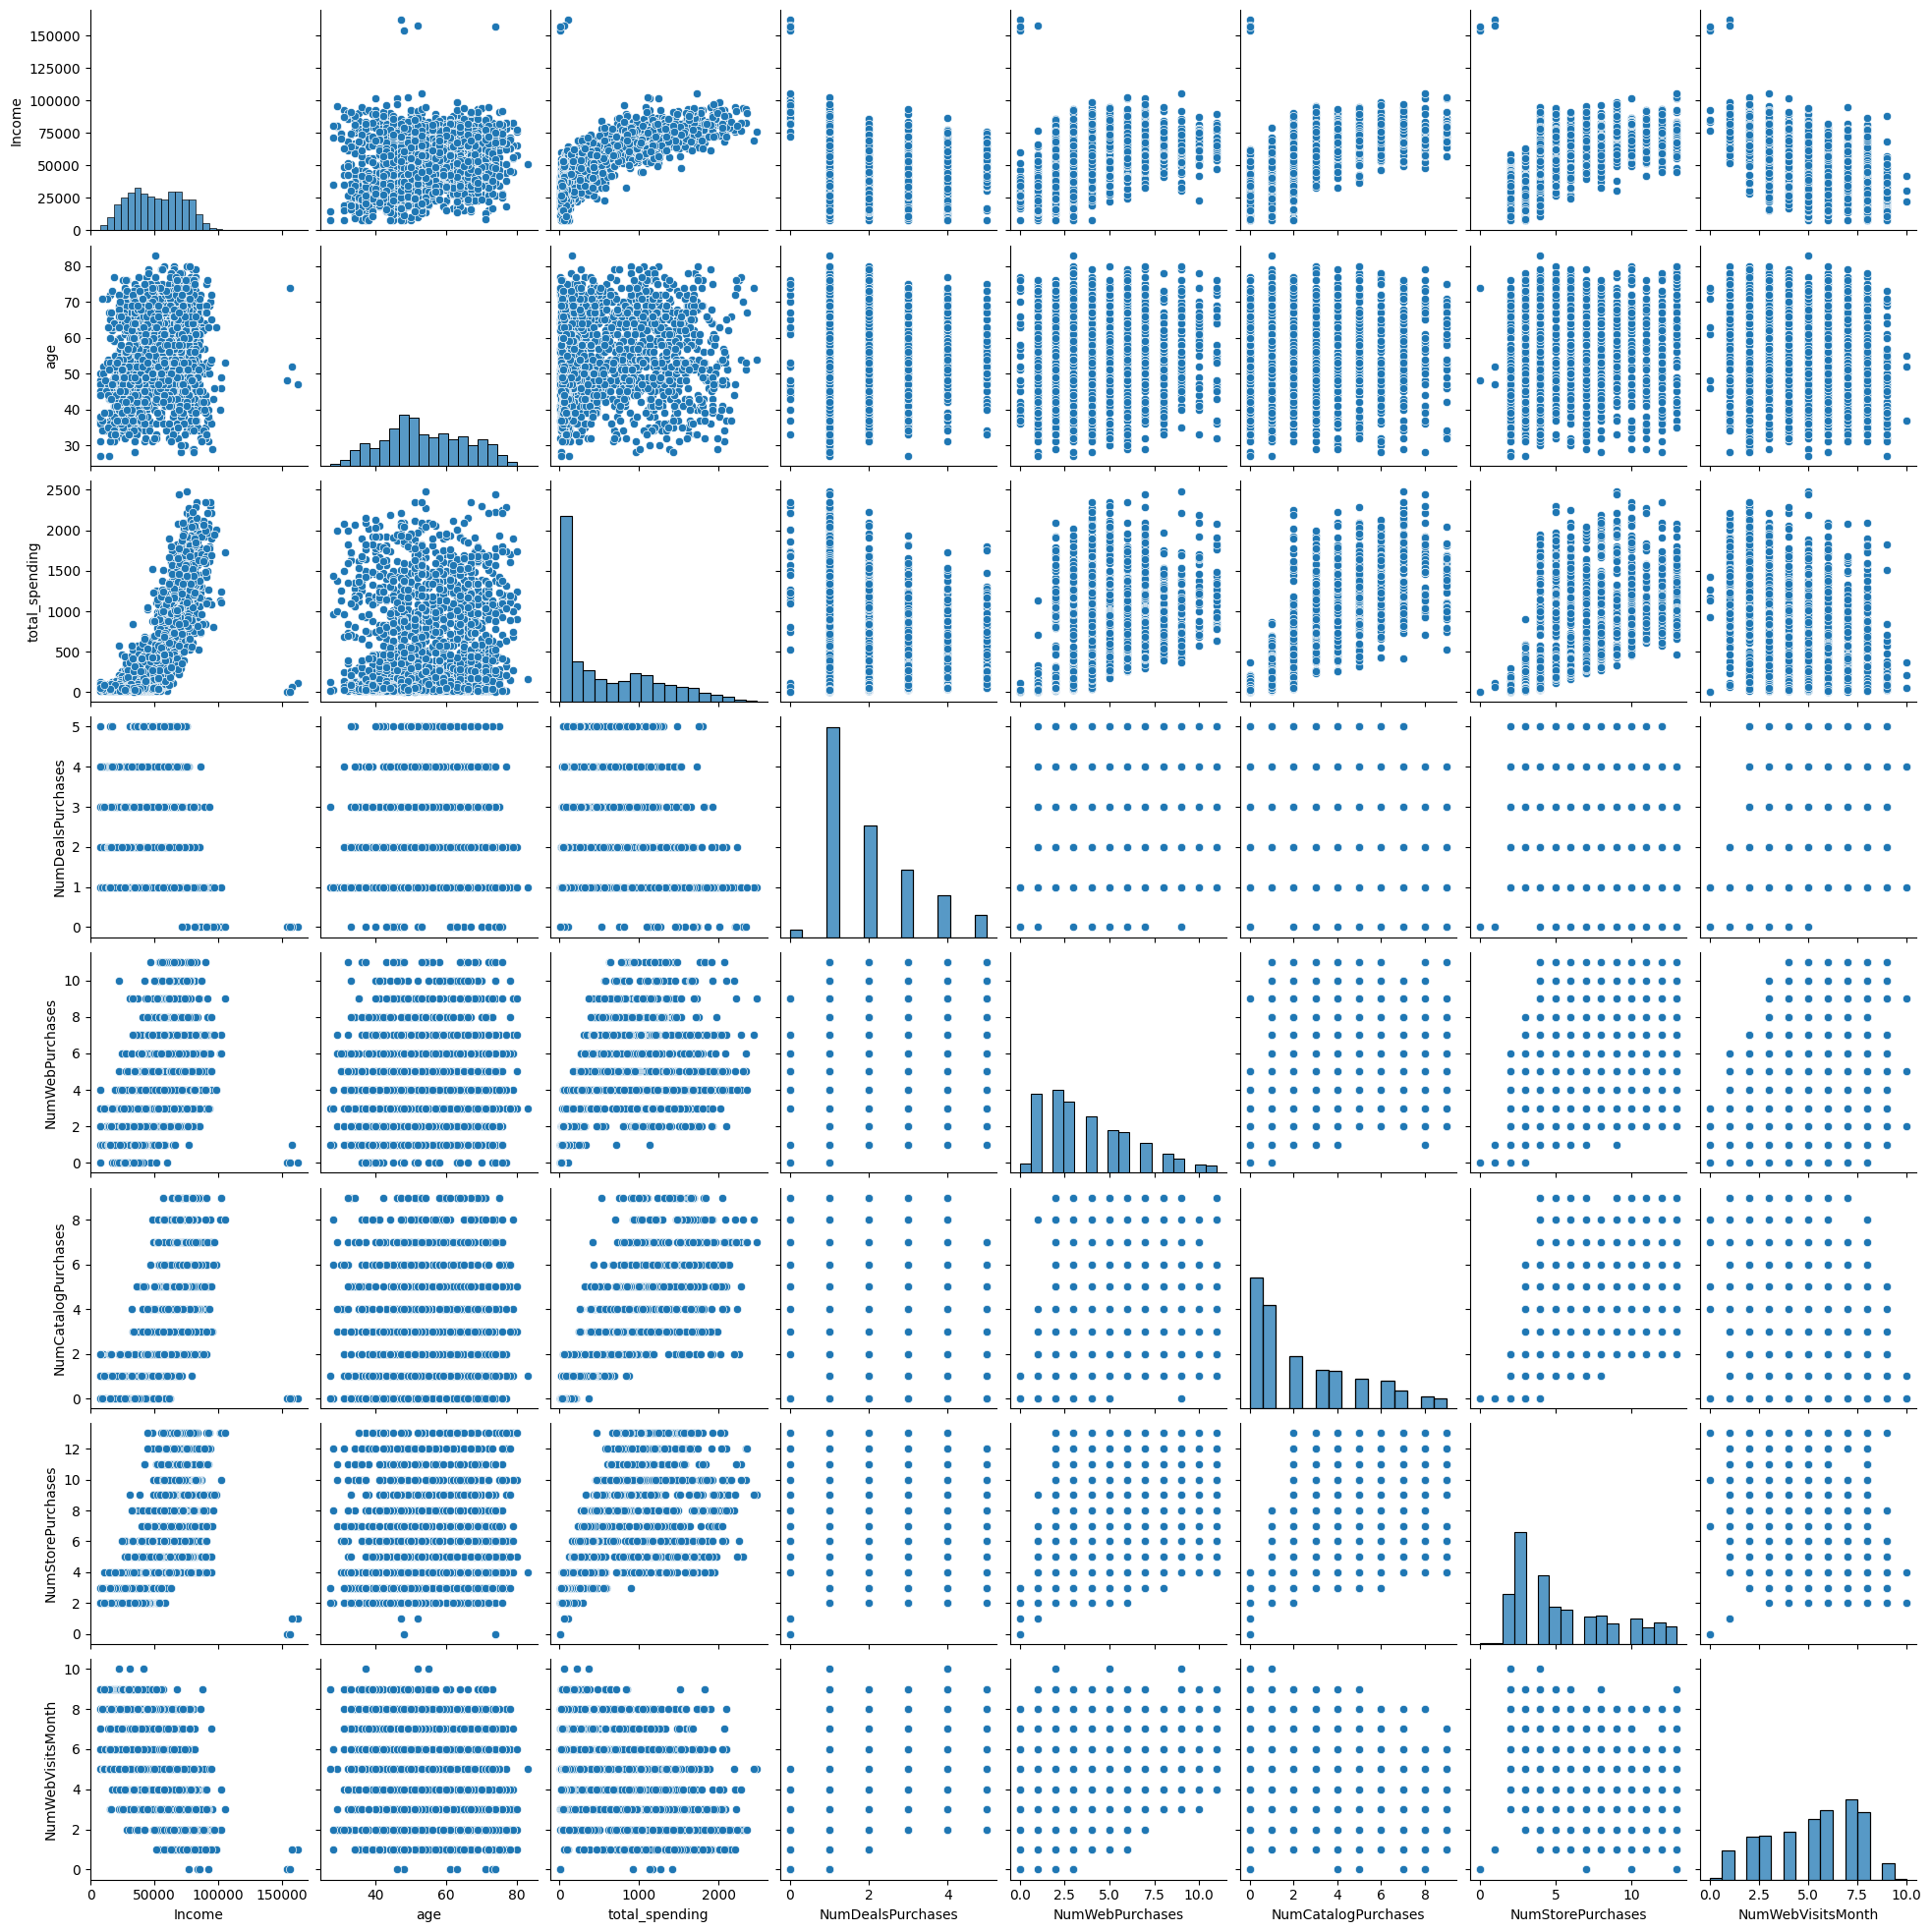

In [21]:
sns.pairplot(df2)

### Analysis for Numerical Attributes


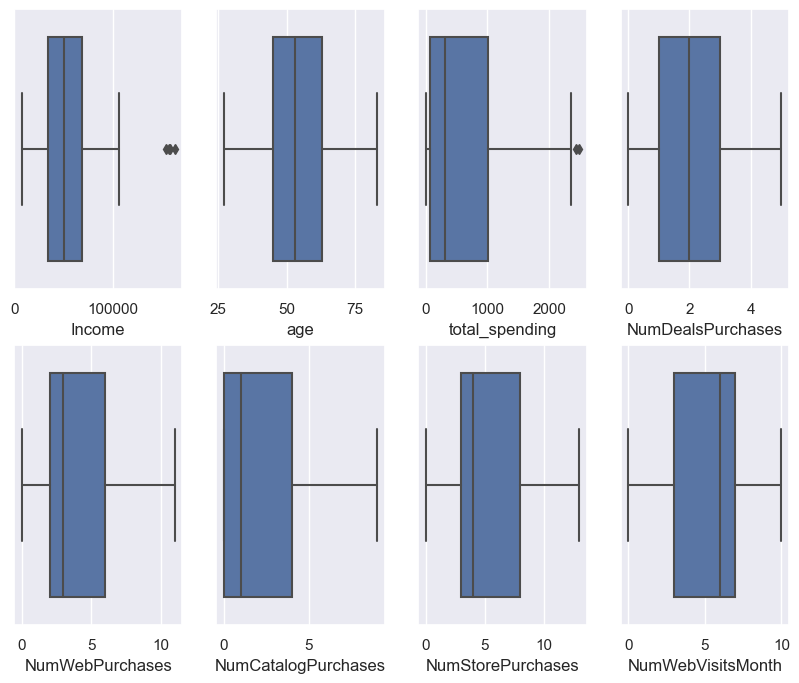

In [22]:
#display the boxplot of those numerical variables altogether
sns.set(style="darkgrid")

fig, axs = plt.subplots(2, 4, figsize=(10, 8))

sns.boxplot(data=df, x="Income", ax=axs[0,0])
sns.boxplot(data=df, x="age", ax=axs[0,1])
sns.boxplot(data=df, x="total_spending", ax=axs[0,2])
sns.boxplot(data=df, x="NumDealsPurchases", ax=axs[0,3])
sns.boxplot(data=df, x="NumWebPurchases", ax=axs[1,0])
sns.boxplot(data=df, x="NumCatalogPurchases", ax=axs[1,1])
sns.boxplot(data=df, x="NumStorePurchases", ax=axs[1,2])
sns.boxplot(data=df, x="NumWebVisitsMonth", ax=axs[1,3])

plt.show()

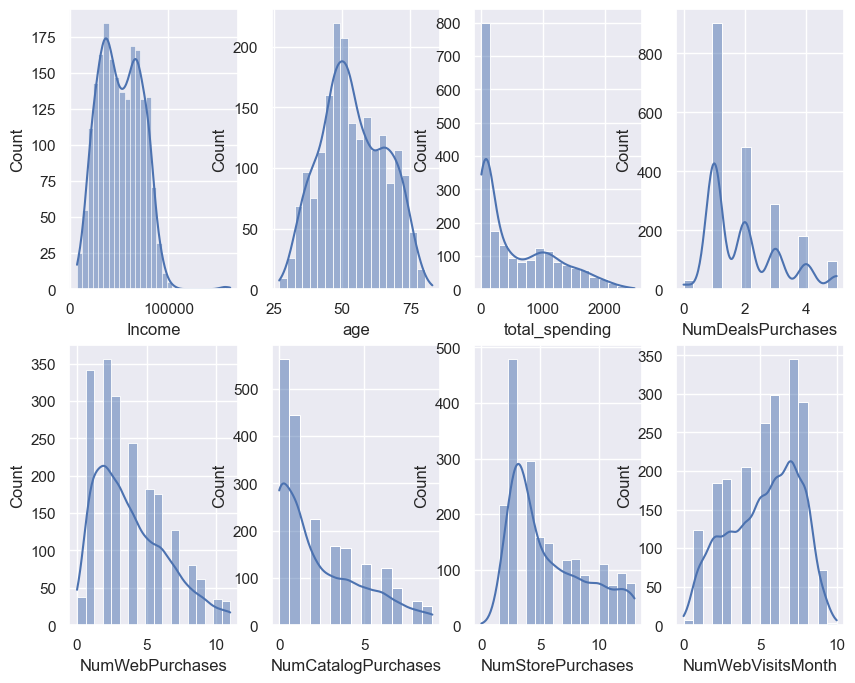

In [23]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")

fig, axs = plt.subplots(2, 4, figsize=(10, 8))

sns.histplot(data=df, x="Income", kde=True,  ax=axs[0, 0])
sns.histplot(data=df, x="age", kde=True,  ax=axs[0, 1])
sns.histplot(data=df, x="total_spending", kde=True,  ax=axs[0, 2])
sns.histplot(data=df, x="NumDealsPurchases", kde=True,  ax=axs[0, 3])
sns.histplot(data=df, x="NumWebPurchases", kde=True,  ax=axs[1, 0])
sns.histplot(data=df, x="NumCatalogPurchases", kde=True,  ax=axs[1, 1])
sns.histplot(data=df, x="NumStorePurchases", kde=True,  ax=axs[1, 2])
sns.histplot(data=df, x="NumWebVisitsMonth", kde=True,  ax=axs[1, 3])

plt.show()

### Analysis for Categorical Attributes (Campaigns)

Campaign by Median of Income 

In [24]:
#empty dictionary to store the median incomes
median_incomes = {}

#iterate over the campaign columns
for campaign in ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']:
    # Check if there are any customers who chose the current campaign
    if (df[campaign] == 1).any():
        # Calculate the median income for customers who chose the current campaign
        median_income = df.loc[df[campaign] == 1, 'Income'].median()
        median_incomes[campaign] = median_income

#print the median incomes for each campaign
for campaign, median_income in median_incomes.items():
    print(f"Median income for customers who chose {campaign}: {median_income}")


Median income for customers who chose AcceptedCmp1: 79205.0
Median income for customers who chose AcceptedCmp2: 70123.0
Median income for customers who chose AcceptedCmp3: 43448.0
Median income for customers who chose AcceptedCmp4: 67921.0
Median income for customers who chose AcceptedCmp5: 82025.0


In [25]:
median_incomes

{'AcceptedCmp1': 79205.0,
 'AcceptedCmp2': 70123.0,
 'AcceptedCmp3': 43448.0,
 'AcceptedCmp4': 67921.0,
 'AcceptedCmp5': 82025.0}

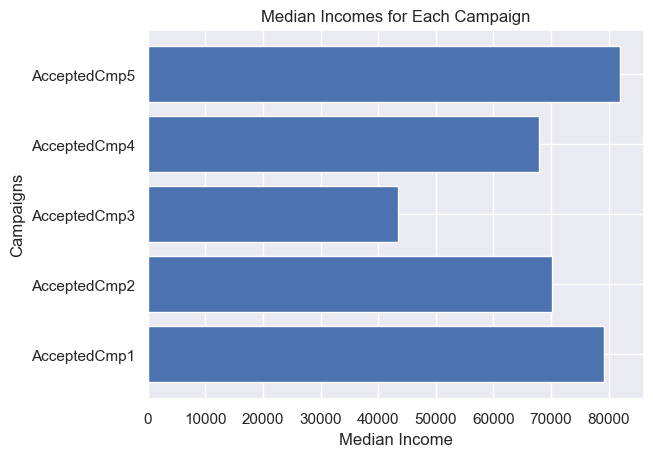

In [26]:
#extract campaign names and median incomes
campaigns = list(median_incomes.keys())
incomes = list(median_incomes.values())

#create a horizontal bar plot
plt.barh(campaigns, incomes)

#set labels and title
plt.xlabel('Median Income')
plt.ylabel('Campaigns')
plt.title('Median Incomes for Each Campaign')

# Display the plot
plt.show()


Campaign by Median of Total Spending

In [27]:
#empty dictionary to store the median spending
median_spending = {}

#iterate over the campaign columns
for campaign in ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']:
    # Check if there are any customers who chose the current campaign
    if (df[campaign] == 1).any():
        # Calculate the median total_spending for customers who chose the current campaign
        median_total_spending = df.loc[df[campaign] == 1, 'total_spending'].median()
        median_spending[campaign] = median_total_spending

#print the median spending for each campaign
for campaign, median_total_spending in median_spending.items():
    print(f"Median total_spending for customers who chose {campaign}: {median_total_spending}")


Median total_spending for customers who chose AcceptedCmp1: 1526.0
Median total_spending for customers who chose AcceptedCmp2: 1374.0
Median total_spending for customers who chose AcceptedCmp3: 358.0
Median total_spending for customers who chose AcceptedCmp4: 1193.5
Median total_spending for customers who chose AcceptedCmp5: 1631.0


In [28]:
median_spending

{'AcceptedCmp1': 1526.0,
 'AcceptedCmp2': 1374.0,
 'AcceptedCmp3': 358.0,
 'AcceptedCmp4': 1193.5,
 'AcceptedCmp5': 1631.0}

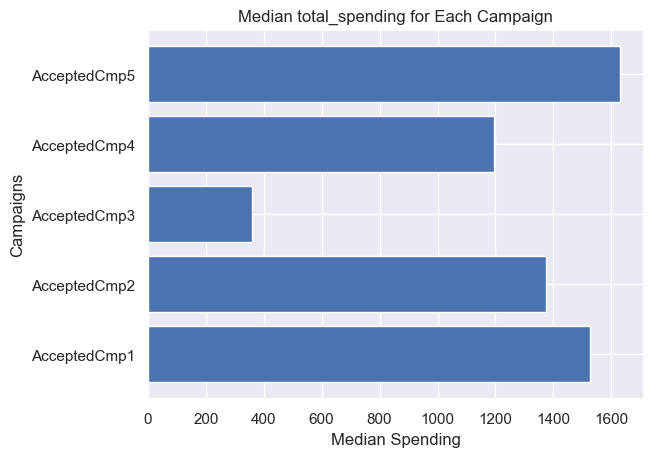

In [29]:
#extract campaign names and median total_spending
campaigns = list(median_spending.keys())
total_spending = list(median_spending.values())

#create a horizontal bar plot
plt.barh(campaigns, total_spending)

#set labels and title
plt.xlabel('Median Spending')
plt.ylabel('Campaigns')
plt.title('Median total_spending for Each Campaign')

# Display the plot
plt.show()


Campaign by Median of Age

In [30]:
#empty dictionary to store the median spending
median_cust_age = {}

#iterate over the campaign columns
for campaign in ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']:
    # Check if there are any customers who chose the current campaign
    if (df[campaign] == 1).any():
        # Calculate the median age for customers who chose the current campaign
        median_age = df.loc[df[campaign] == 1, 'age'].median()
        median_cust_age[campaign] = median_age

#print the median spending for each campaign
for campaign, median_age in median_cust_age.items():
    print(f"Median age for customers who chose {campaign}: {median_age}")


Median age for customers who chose AcceptedCmp1: 54.0
Median age for customers who chose AcceptedCmp2: 54.0
Median age for customers who chose AcceptedCmp3: 50.0
Median age for customers who chose AcceptedCmp4: 56.0
Median age for customers who chose AcceptedCmp5: 52.0


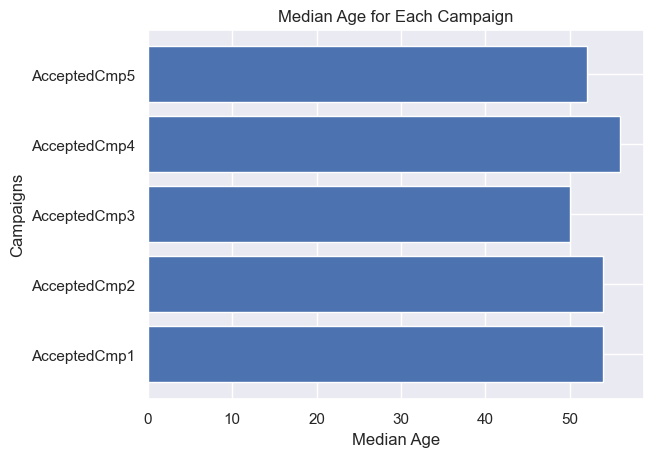

In [31]:
#extract campaign names and median total_spending
campaigns = list(median_cust_age.keys())
total_spending = list(median_cust_age.values())

#create a horizontal bar plot
plt.barh(campaigns, total_spending)

#set labels and title
plt.xlabel('Median Age')
plt.ylabel('Campaigns')
plt.title('Median Age for Each Campaign')

# Display the plot
plt.show()


Campaign by Marital Status

In [32]:
# Create dictionaries to store the counts
campaign_by_married = {}
campaign_by_not_married = {}

# Iterate over the campaigns
for campaign in ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']:
    # Count customers for married and not married customers
    married_count = df.loc[df['marital_status_new'] == 1, campaign].sum()
    not_married_count = df.loc[df['marital_status_new'] == 0, campaign].sum()

    # Add the counts to the respective dictionaries
    campaign_by_married[campaign] = married_count
    campaign_by_not_married[campaign] = not_married_count

# Display the results
print("campaign_by_married:", campaign_by_married)
print("campaign_by_not_married:", campaign_by_not_married)

campaign_by_married: {'AcceptedCmp1': 81, 'AcceptedCmp2': 17, 'AcceptedCmp3': 86, 'AcceptedCmp4': 92, 'AcceptedCmp5': 96}
campaign_by_not_married: {'AcceptedCmp1': 40, 'AcceptedCmp2': 10, 'AcceptedCmp3': 52, 'AcceptedCmp4': 52, 'AcceptedCmp5': 43}


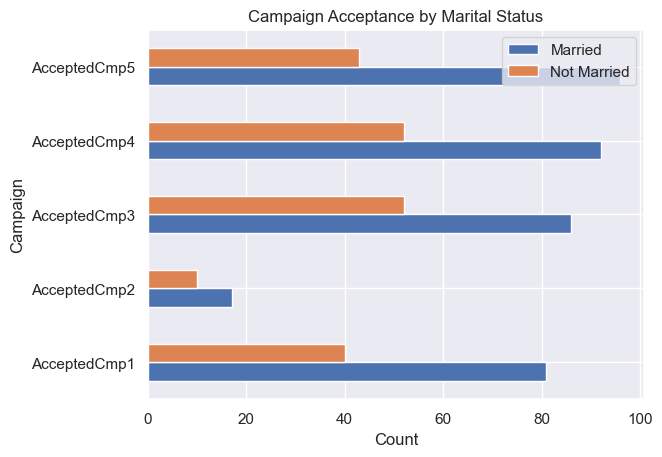

In [33]:
# Create a DataFrame from the campaign dictionaries
data_married = pd.DataFrame([campaign_by_married, campaign_by_not_married])

# Rename the rows to indicate the marital status
data_married.index = ['Married', 'Not Married']

# Transpose the DataFrame for a horizontal view
data_married = data_married.T

# Plot the crosstab as a horizontal bar plot
data_married.plot.barh()

# Set the plot title and axis labels
plt.title('Campaign Acceptance by Marital Status')
plt.xlabel('Count')
plt.ylabel('Campaign')

# Show the plot
plt.show()

Campaign by Child Status

In [34]:
# Create dictionaries to store the counts
campaign_by_havechildren = {}
campaign_by_not_havechildren = {}

# Iterate over the campaigns
for campaign in ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']:
    # Count customers for havechildren and not havechildren customers
    havechildren_count = df.loc[df['child_new'] == 1, campaign].sum()
    not_havechildren_count = df.loc[df['child_new'] == 0, campaign].sum()

    # Add the counts to the respective dictionaries
    campaign_by_havechildren[campaign] = havechildren_count
    campaign_by_not_havechildren[campaign] = not_havechildren_count

# Display the results
print("campaign_by_havechildren:", campaign_by_havechildren)
print("campaign_by_not_havechildren:", campaign_by_not_havechildren)

campaign_by_havechildren: {'AcceptedCmp1': 7, 'AcceptedCmp2': 2, 'AcceptedCmp3': 71, 'AcceptedCmp4': 14, 'AcceptedCmp5': 8}
campaign_by_not_havechildren: {'AcceptedCmp1': 114, 'AcceptedCmp2': 25, 'AcceptedCmp3': 67, 'AcceptedCmp4': 130, 'AcceptedCmp5': 131}


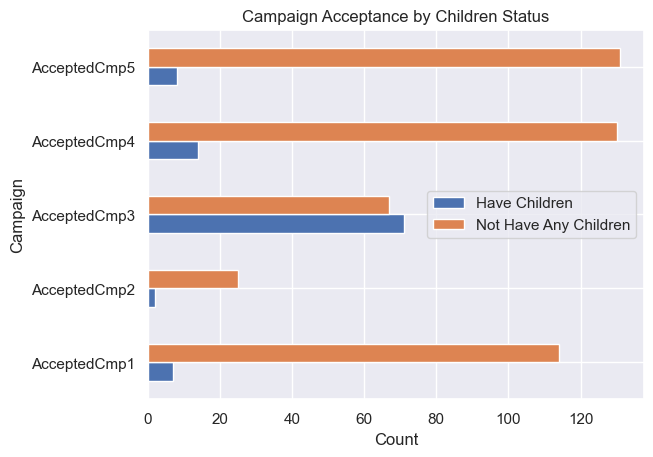

In [35]:
# Create a DataFrame from the campaign dictionaries
data_havechildren = pd.DataFrame([campaign_by_havechildren, campaign_by_not_havechildren])

# Rename the rows to indicate the marital status
data_havechildren.index = ['Have Children', 'Not Have Any Children']

# Transpose the DataFrame for a horizontal view
data_havechildren = data_havechildren.T

# Plot the crosstab as a horizontal bar plot
data_havechildren.plot.barh()

# Set the plot title and axis labels
plt.title('Campaign Acceptance by Children Status')
plt.xlabel('Count')
plt.ylabel('Campaign')

# Show the plot
plt.show()

Campaign by Educations

In [36]:
# Create dictionaries to store the counts
campaign_by_highschool = {}
campaign_by_undergraduate = {}
campaign_by_master = {}
campaign_by_phd = {}


# Iterate over the campaigns
for campaign in ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']:
    # Count customers for education 
    highschool_count = df.loc[df['education_new'] == 0, campaign].sum()
    undergraduate_count = df.loc[df['education_new'] == 1, campaign].sum()
    master_count = df.loc[df['education_new'] == 2, campaign].sum()
    phd_count = df.loc[df['education_new'] == 3, campaign].sum()

    # Add the counts to the respective dictionaries
    campaign_by_highschool[campaign] = highschool_count
    campaign_by_undergraduate[campaign] = undergraduate_count
    campaign_by_master[campaign] = master_count
    campaign_by_phd[campaign] = phd_count

# Display the results
print("campaign_by_highschool:", campaign_by_highschool)
print("campaign_by_undergraduate:", campaign_by_undergraduate)
print("campaign_by_master:", campaign_by_master)
print("campaign_by_phd:", campaign_by_phd)


campaign_by_highschool: {'AcceptedCmp1': 0, 'AcceptedCmp2': 0, 'AcceptedCmp3': 6, 'AcceptedCmp4': 0, 'AcceptedCmp5': 0}
campaign_by_undergraduate: {'AcceptedCmp1': 68, 'AcceptedCmp2': 13, 'AcceptedCmp3': 70, 'AcceptedCmp4': 71, 'AcceptedCmp5': 76}
campaign_by_master: {'AcceptedCmp1': 28, 'AcceptedCmp2': 4, 'AcceptedCmp3': 33, 'AcceptedCmp4': 33, 'AcceptedCmp5': 29}
campaign_by_phd: {'AcceptedCmp1': 25, 'AcceptedCmp2': 10, 'AcceptedCmp3': 29, 'AcceptedCmp4': 40, 'AcceptedCmp5': 34}


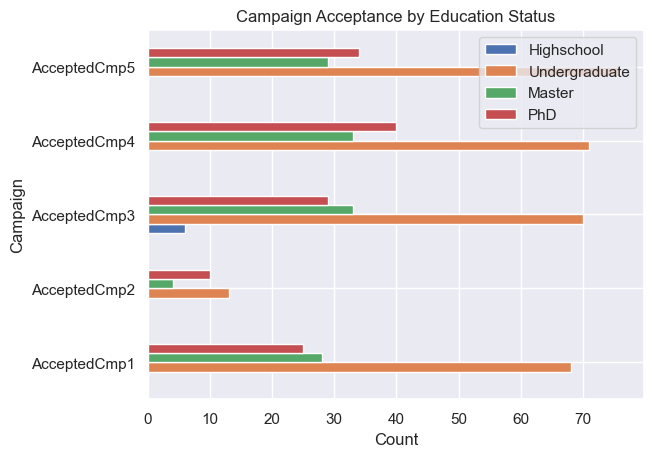

In [37]:
# Create a DataFrame from the campaign dictionaries
data_education = pd.DataFrame([campaign_by_highschool, campaign_by_undergraduate, campaign_by_master, campaign_by_phd])

# Rename the rows to indicate the marital status
data_education.index = ['Highschool', 'Undergraduate', 'Master', 'PhD']

# Transpose the DataFrame for a horizontal view
data_education = data_education.T

# Plot the crosstab as a horizontal bar plot
data_education.plot.barh()

# Set the plot title and axis labels
plt.title('Campaign Acceptance by Education Status')
plt.xlabel('Count')
plt.ylabel('Campaign')

# Show the plot
plt.show()

Campaign by Type of Purchase

In [38]:
# Create a dictionary to store the purchase totals for each campaign
purchase_by_discount = {}
purchase_by_web = {}
purchase_by_catalog = {}
purchase_by_store = {}

# Iterate over each campaign
for campaign in ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']:
    # Filter the DataFrame to include only rows where the campaign is accepted
    accepted_rows = df[df[campaign] == 1]
    
    # Calculate the sum of each purchase type for the accepted rows
    purchase_sum_discount = accepted_rows['NumDealsPurchases'].sum()
    purchase_sum_web = accepted_rows['NumWebPurchases'].sum()
    purchase_sum_catalog = accepted_rows['NumCatalogPurchases'].sum()
    purchase_sum_store = accepted_rows['NumStorePurchases'].sum()
    
    # Store the results in the respective dictionaries
    purchase_by_discount[campaign] = purchase_sum_discount
    purchase_by_web[campaign] = purchase_sum_web
    purchase_by_catalog[campaign] = purchase_sum_catalog
    purchase_by_store[campaign] = purchase_sum_store

# Print the results
print("purchase_by_discount:", purchase_by_discount)
print("purchase_by_web:", purchase_by_web)
print("purchase_by_catalog:", purchase_by_catalog)
print("purchase_by_store:", purchase_by_store)

purchase_by_discount: {'AcceptedCmp1': 153, 'AcceptedCmp2': 42, 'AcceptedCmp3': 281, 'AcceptedCmp4': 284, 'AcceptedCmp5': 146}
purchase_by_web: {'AcceptedCmp1': 692, 'AcceptedCmp2': 133, 'AcceptedCmp3': 577, 'AcceptedCmp4': 813, 'AcceptedCmp5': 765}
purchase_by_catalog: {'AcceptedCmp1': 685, 'AcceptedCmp2': 131, 'AcceptedCmp3': 414, 'AcceptedCmp4': 567, 'AcceptedCmp5': 770}
purchase_by_store: {'AcceptedCmp1': 1013, 'AcceptedCmp2': 229, 'AcceptedCmp3': 652, 'AcceptedCmp4': 1150, 'AcceptedCmp5': 1176}


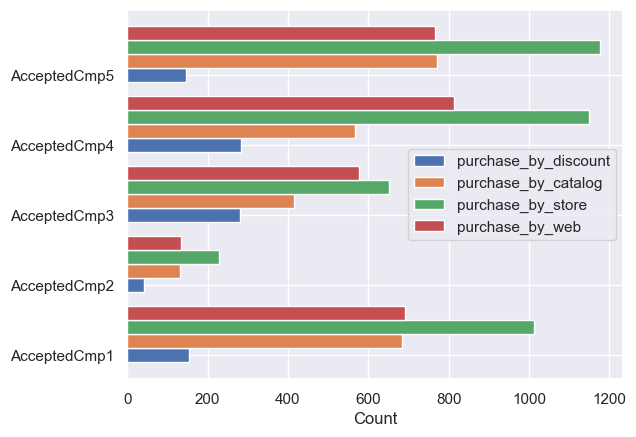

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data
campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
methods = ['purchase_by_discount', 'purchase_by_catalog', 'purchase_by_store', 'purchase_by_web']
counts = np.array([
    [purchase_by_discount[campaign] for campaign in campaigns],
    [purchase_by_catalog[campaign] for campaign in campaigns],
    [purchase_by_store[campaign] for campaign in campaigns],
    [purchase_by_web[campaign] for campaign in campaigns]
])

# Create the figure and axes
fig, ax = plt.subplots()

# Set the y-axis labels
ax.set_yticks(np.arange(len(campaigns)))
ax.set_yticklabels(campaigns)

# Set the x-axis labels
ax.set_xlabel('Count')

# Plot the horizontal bars
bar_width = 0.2
index = np.arange(len(campaigns))

for i, method in enumerate(methods):
    ax.barh(index + i * bar_width, counts[i], bar_width, label=method)

# Add a legend
ax.legend()

# Show the plot
plt.show()


### Categorical Analysis (Demography)

In [40]:
df.head()

,CustomerID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_CostContact,Z_Revenue,Response,age,weeks_since_joining,months_since_joining,total_spending,marital_status_new,child_new,education_new
0,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,3,11,0,69,496,114,27,0,1,1
1,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,3,11,0,58,524,121,776,1,0,1
2,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,3,11,0,39,499,115,53,1,1,1
3,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,11,0,42,503,116,422,1,1,3
4,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,3,11,0,56,521,120,716,1,0,2


By Marital Status

In [41]:
# Subset the dataframe with the specific variables
subset_df_marital = df[['marital_status_new', 'Income', 'total_spending']]


In [42]:
subset_df_marital.head()

,marital_status_new,Income,total_spending
0,0,46344.0,27
1,1,71613.0,776
2,1,26646.0,53
3,1,58293.0,422
4,1,62513.0,716


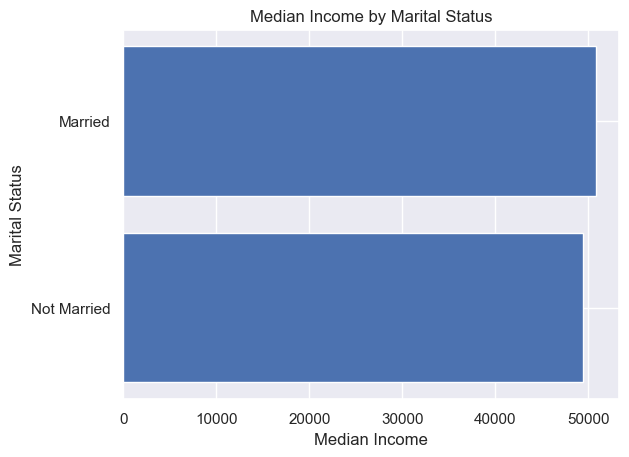

In [43]:
grouped = subset_df_marital.groupby('marital_status_new')['Income'].median()
marital_status_labels = {
    0: 'Not Married',
    1: 'Married'
}

plt.barh([marital_status_labels[x] for x in grouped.index], grouped.values)

plt.xlabel('Median Income')
plt.ylabel('Marital Status')
plt.title('Median Income by Marital Status')

plt.show()

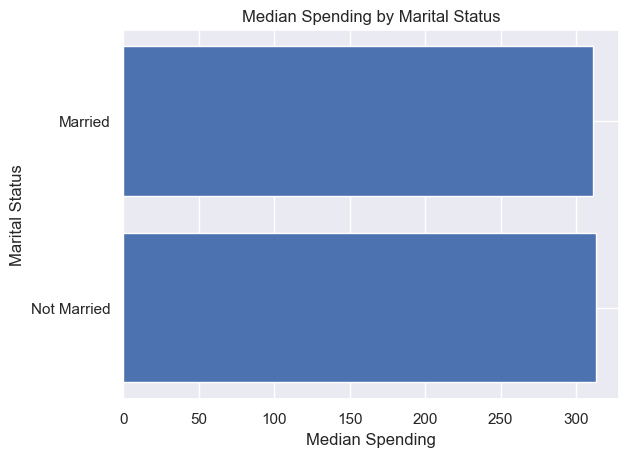

In [44]:
grouped = subset_df_marital.groupby('marital_status_new')['total_spending'].median()
marital_status_labels = {
    0: 'Not Married',
    1: 'Married'
}

plt.barh([marital_status_labels[x] for x in grouped.index], grouped.values)

plt.xlabel('Median Spending')
plt.ylabel('Marital Status')
plt.title('Median Spending by Marital Status')

plt.show()

By Children Status

In [45]:
# Subset the dataframe with the specific variables
subset_df_children = df[['child_new', 'Income', 'total_spending']]


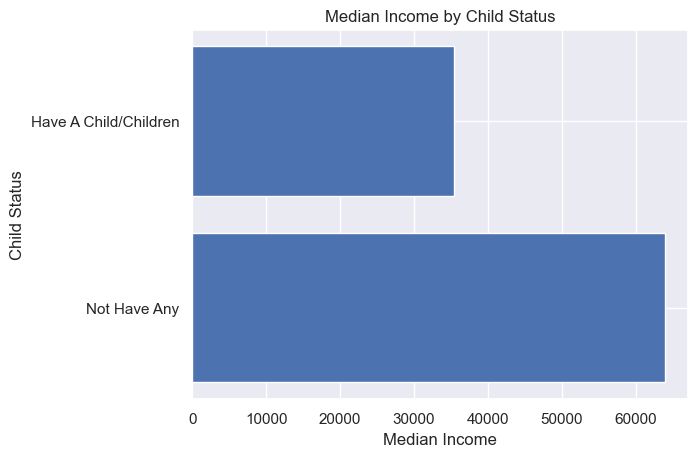

In [46]:
grouped = subset_df_children.groupby('child_new')['Income'].median()
child_status_labels = {
    0: 'Not Have Any',
    1: 'Have A Child/Children'
}

plt.barh([child_status_labels[x] for x in grouped.index], grouped.values)

plt.xlabel('Median Income')
plt.ylabel('Child Status')
plt.title('Median Income by Child Status')

plt.show()

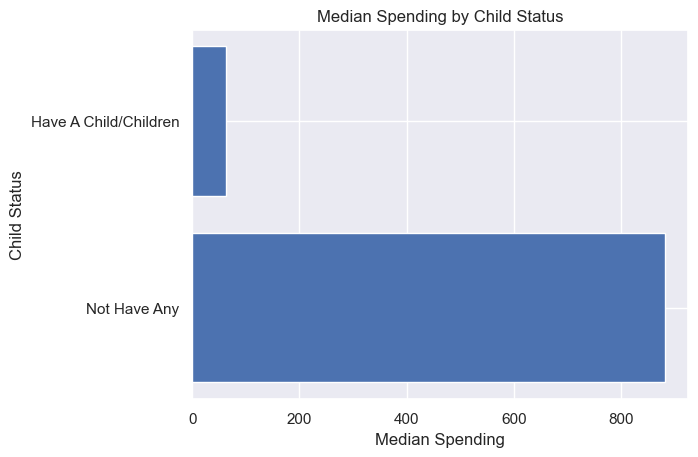

In [47]:
grouped = subset_df_children.groupby('child_new')['total_spending'].median()
child_status_labels = {
    0: 'Not Have Any',
    1: 'Have A Child/Children'
}

plt.barh([child_status_labels[x] for x in grouped.index], grouped.values)

plt.xlabel('Median Spending')
plt.ylabel('Child Status')
plt.title('Median Spending by Child Status')

plt.show()

by Education

In [48]:
# Subset the dataframe with the specific variables
subset_df_education = df[['education_new', 'Income', 'total_spending']]


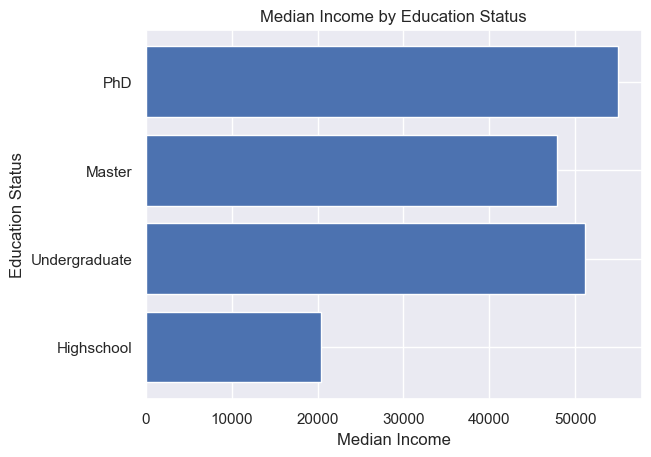

In [49]:
grouped = subset_df_education.groupby('education_new')['Income'].median()
education_status_labels = {
    0: 'Highschool',
    1: 'Undergraduate',
    2: 'Master',
    3: 'PhD'
}

plt.barh([education_status_labels[x] for x in grouped.index], grouped.values)

plt.xlabel('Median Income')
plt.ylabel('Education Status')
plt.title('Median Income by Education Status')

plt.show()

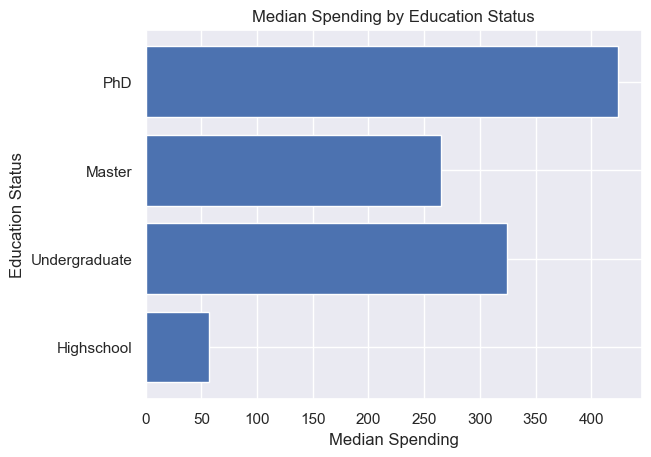

In [50]:
grouped = subset_df_education.groupby('education_new')['total_spending'].median()
education_status_labels = {
    0: 'Highschool',
    1: 'Undergraduate',
    2: 'Master',
    3: 'PhD'
}

plt.barh([education_status_labels[x] for x in grouped.index], grouped.values)

plt.xlabel('Median Spending')
plt.ylabel('Education Status')
plt.title('Median Spending by Education Status')

plt.show()

# FIN